In [167]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [168]:
data= pd.read_csv('Mall_Customers.csv')
df= pd.DataFrame(data)
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [169]:
df.head()
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [170]:
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Text(0.5, 1.0, 'Distribution plot of Spending Score (1-100)')

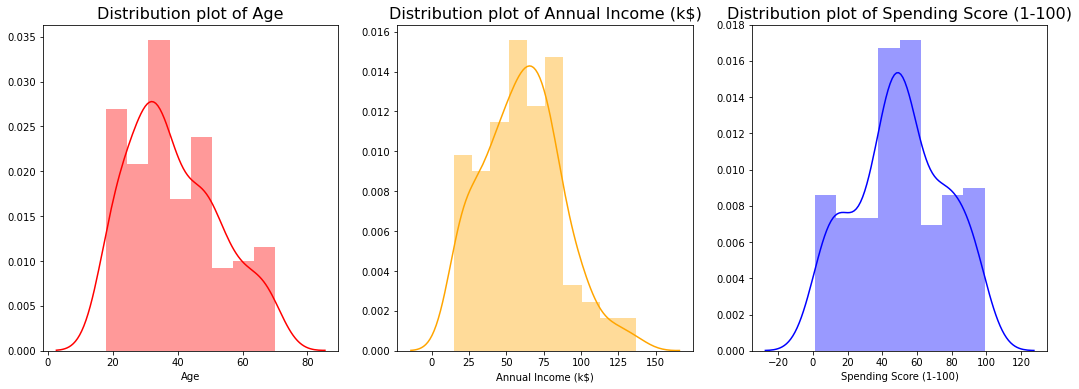

In [171]:
plt.rcParams['figure.figsize'] = (18,6)
plt.subplot(1,3,1)
sns.distplot(data['Age'],color = 'red')
plt.title("Distribution plot of Age", fontsize=16)

plt.subplot(1,3,2)
sns.distplot(data['Annual Income (k$)'], color='orange')
plt.title("Distribution plot of Annual Income (k$)", fontsize=16)

plt.subplot(1,3,3)
sns.distplot(data['Spending Score (1-100)'], color='blue')
plt.title("Distribution plot of Spending Score (1-100)", fontsize=16)

Text(0.5, 1.0, 'Distribution plot of Spending Score (1-100)')

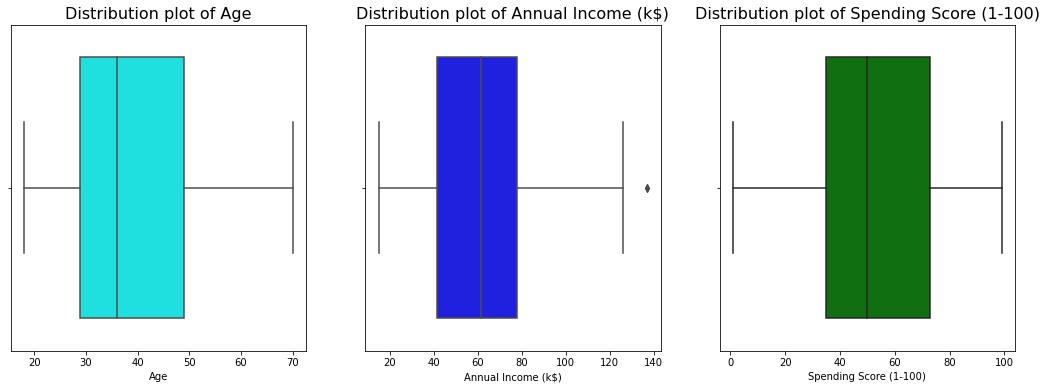

In [172]:
plt.rcParams['figure.figsize'] = (18,6)

plt.subplot(1,3,1)
sns.boxplot(data['Age'],color = 'cyan')
plt.title("Distribution plot of Age", fontsize=16)

plt.subplot(1,3,2)
sns.boxplot(data['Annual Income (k$)'], color='blue')
plt.title("Distribution plot of Annual Income (k$)", fontsize=16)

plt.subplot(1,3,3)
sns.boxplot(data['Spending Score (1-100)'], color='green')
plt.title("Distribution plot of Spending Score (1-100)", fontsize=16)
#There is one outlier in annual income plot resulting probably due to difference in incomes of customers

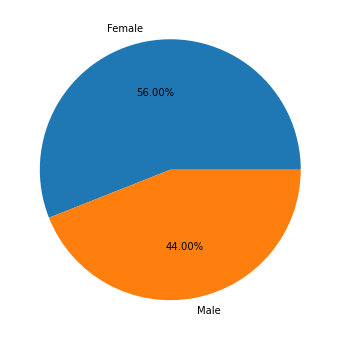

In [173]:
#Pie chart to visualize the proportion of male and female customers
plt.rcParams['figure.figsize'] = (12,6)

plt.pie(data['Gender'].value_counts(), labels = ['Female','Male'],autopct = '%.2f%%')
plt.show()

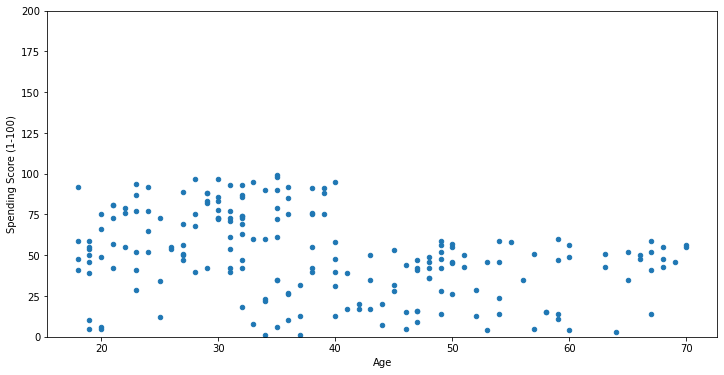

In [174]:
#scatter plot of age and spending score shows that younger people spend more
var = 'Age'
data = pd.concat([df['Spending Score (1-100)'], df[var]], axis=1)
data.plot.scatter(x=var, y='Spending Score (1-100)', ylim=(0,200));

Text(0.5, 1.0, 'CountPlot of Age')

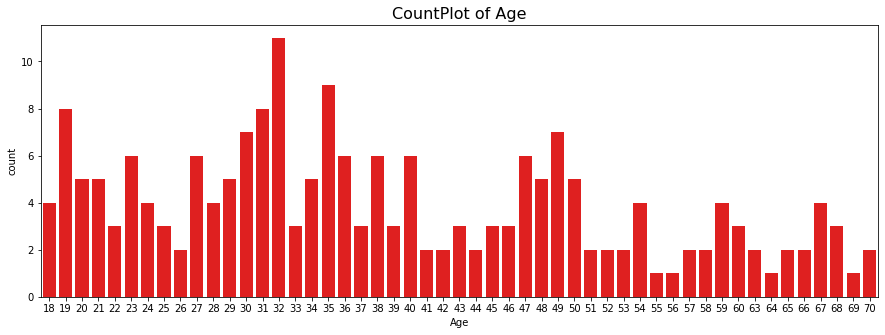

In [175]:
plt.rcParams['figure.figsize'] = (15,5)

#Countplot of Age 
sns.countplot(data['Age'], color='red')
plt.title("CountPlot of Age", fontsize=16)

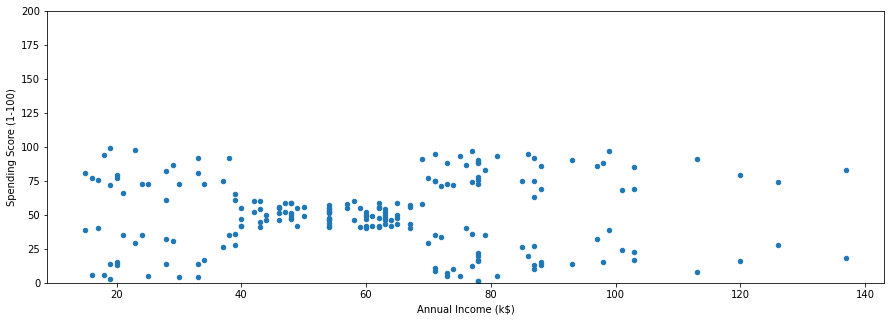

In [176]:
var = 'Annual Income (k$)'
data = pd.concat([df['Spending Score (1-100)'], df[var]], axis=1)
data.plot.scatter(x=var, y='Spending Score (1-100)', ylim=(0,200));

In [177]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [178]:
df.drop(['CustomerID'], axis=1 , inplace=True)

In [179]:
sc = StandardScaler()
data_sc = sc.fit_transform(df.drop(['Gender'], axis=1))
data_sc_df = pd.DataFrame(data_sc)
data_sc_df.columns = ['Age','Annual Income (k$)','Spending Score (1-100)']

In [180]:
data_dr = df[['Gender']]
data_sc_new = pd.concat([data_dr,data_sc_df], axis=1)

In [183]:
data_k = data_sc_new[['Age','Annual Income (k$)','Spending Score (1-100)']]
data_k.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [210]:
X = data_k.iloc[:, [1,2]].values

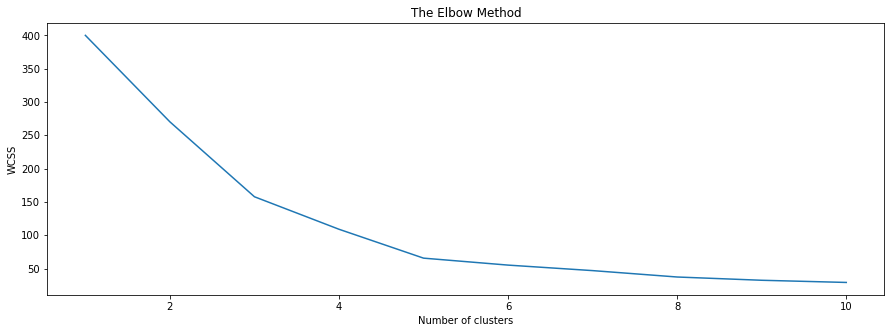

In [211]:
#Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [212]:
#Training the Kmeans model on the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

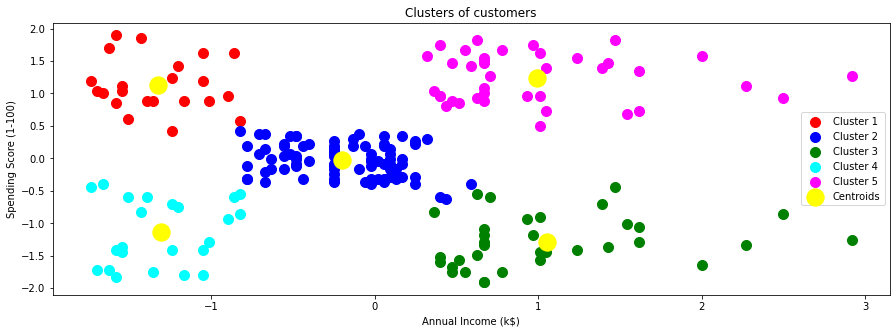

In [213]:

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

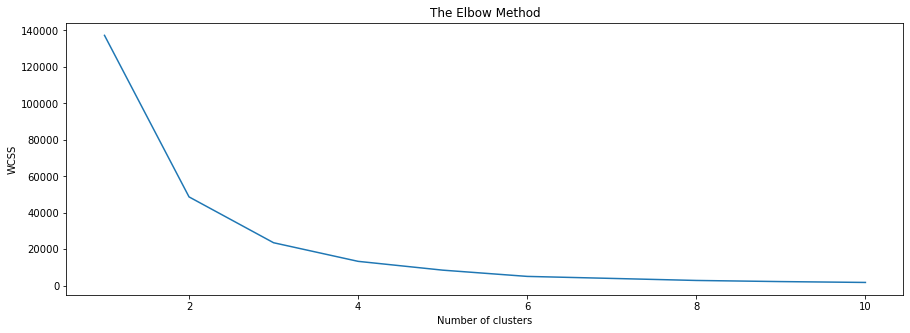

In [217]:
X2 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [218]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_


In [219]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

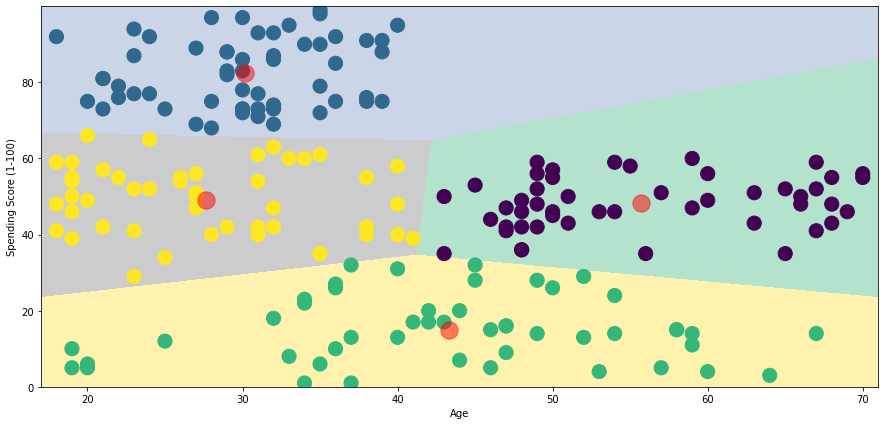

In [220]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()